In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('handlandmarks.csv')

In [82]:
x = df.drop('label', axis=1).values
y = df['label'].values

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
# Reshape the data for the CNN model
X_train_cnn = X_train.reshape(-1, 42, 1)
X_test_cnn = X_test.reshape(-1, 42, 1)


In [85]:
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(42, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(26, activation='softmax'))

c:\Users\Asian\DSP\dsp\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [86]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
# Train the CNN model
history = cnn_model.fit(X_train_cnn, tf.keras.utils.to_categorical(y_train), epochs=25, batch_size=32, validation_data=(X_test_cnn, tf.keras.utils.to_categorical(y_test)))

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0622 - loss: 3.2178 - val_accuracy: 0.1250 - val_loss: 3.0716
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1259 - loss: 2.9765 - val_accuracy: 0.1538 - val_loss: 2.8262
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1586 - loss: 2.7020 - val_accuracy: 0.2981 - val_loss: 2.5603
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3423 - loss: 2.4169 - val_accuracy: 0.4038 - val_loss: 2.2747
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4617 - loss: 2.1775 - val_accuracy: 0.5000 - val_loss: 2.0248
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6020 - loss: 1.8617 - val_accuracy: 0.5096 - val_loss: 1.7563
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6324 - loss: 1.6628 - val_accuracy: 0.6058 - val_loss: 1.5045
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6239 - loss: 1.4583 - val_accuracy: 0.6058 - val_loss

In [88]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_class_cnn = np.argmax(y_pred_cnn, axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_class_cnn)
print(f'Test accuracy (CNN): {accuracy_cnn:.3f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test accuracy (CNN): 0.971


In [89]:
# cnn_model.save('cnn_model.h5')

In [90]:
# Define the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma=0.1)
# svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
# svm_model = SVC(kernel='poly', degree=2, C=1, gamma=0.1)
# svm_model = SVC(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train, y_train)


SVC(C=1, gamma=0.1)

In [91]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Test accuracy (SVM): {accuracy_svm:.3f}')

Test accuracy (SVM): 0.606


In [92]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [93]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Test accuracy (Random Forest): {accuracy_rf:.3f}')


Test accuracy (Random Forest): 0.981


In [94]:
# Create a confusion matrix for each model
conf_mat_cnn = confusion_matrix(y_test, y_pred_class_cnn)
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)


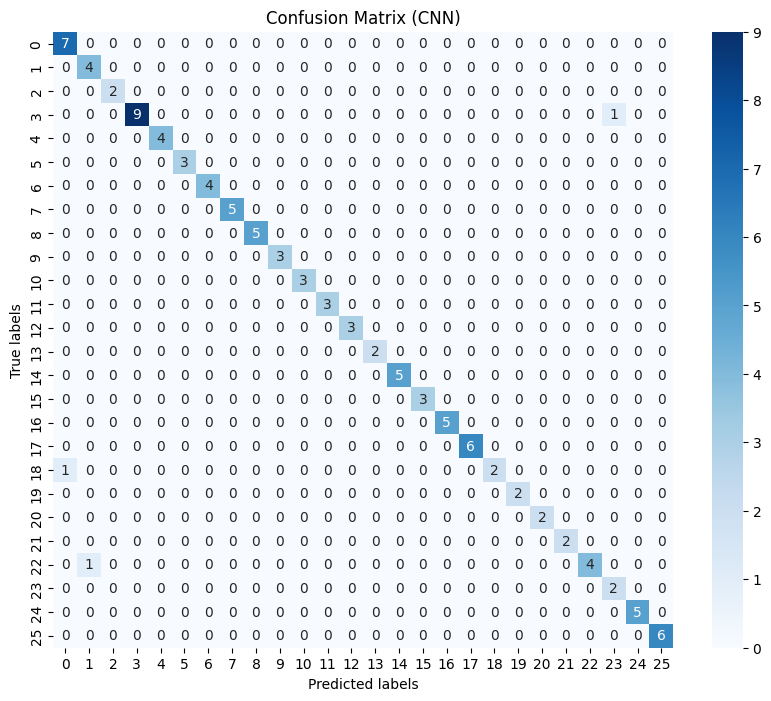

In [95]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_cnn, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (CNN)')
plt.show()

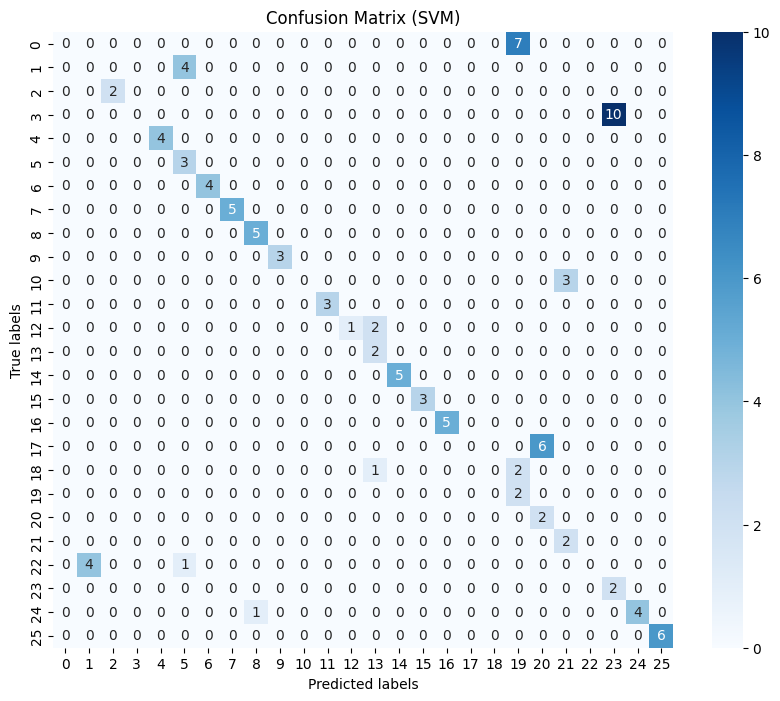

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_svm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVM)')
plt.show()

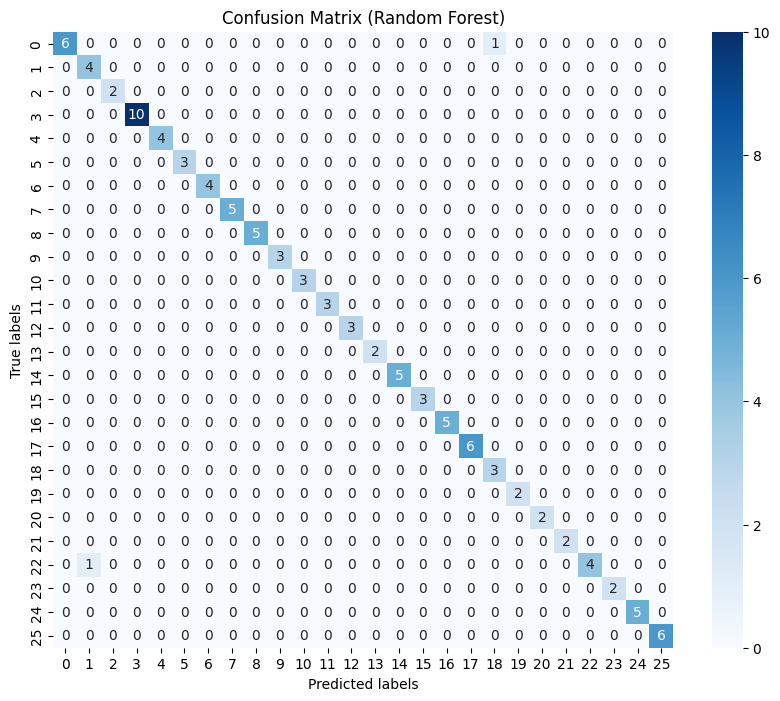

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rf, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()